# Data processing

## Imports and globals

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

FILE_NAME = "datos-crudos.csv"
UNUSED_COLUMNS = ["nombre", "historia", "fecha", "diagnostico"]

In [4]:
df = pd.read_csv(FILE_NAME)
print(df.head())

                        nombre  edad  historia       fecha  cancer  \
0  DIMANA ALEKSANDROVA SLAVOVA  41.0  462830.0  19/04/2022       1   
1          ENRIQUE CLAVER SANZ  73.0   48040.0  14/12/2022       1   
2      FERNANDO CARRERES FALCO  67.0   46465.0  21/12/2021       1   
3           RAMON SEGURA LOPEZ  68.0  205449.0  04/04/2023       1   
4     JOSE MARIA SANCHO PARETS  83.0  200475.0  08/10/2021       1   

   diagnostico filtrado-glomerular-estimado glucosa creatinina urea  ...  \
0          NaN                          NaN      83       0.67   29  ...   
1          NaN                           43     154       1.60   82  ...   
2          NaN                          149      94       0.55   22  ...   
3          NaN                           97      83       0.70   30  ...   
4          NaN                           66      96       1.07   40  ...   

  eosinofilos basofilos    N    L    M    E    B plaquetas  MPV  \
0         0.8       0.3  9.1  1.6  0.6  0.1  0.0     48

In [5]:
# Remove unused columns
df = df.drop(columns=UNUSED_COLUMNS)

In [6]:
# Convert every string into float value
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# Convert every value other than 0 in "cancer" to 1
df['cancer'] = df['cancer'].apply(lambda x: 1 if x != 0 else x)

## Full data classification

In [8]:
# Drop columns that have at least one empty data
df_full_data = df.dropna(axis=1)
# Print the columns names
print(df_full_data.columns)

Index(['cancer', 'GPT', 'sodio', 'cloruro'], dtype='object')


In [9]:
# Sepparate the "cancer" column into a target dataframe
target_full_data = df_full_data["cancer"]
# Drop the "cancer" column from the dataframe
df_full_data = df_full_data.drop(columns=["cancer"])

In [10]:
# Create a test and train groups
X_train, X_test, y_train, y_test = train_test_split(df_full_data, target_full_data, test_size=0.2, random_state=42)

### Random Forest

In [11]:
# Initiate a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

In [12]:
# Set the random fores classifier to use df_full_data and sepparate in two groups
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Show the results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


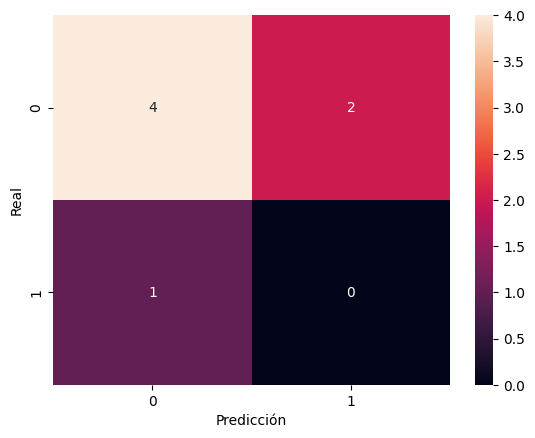

In [14]:
# Classification matrix with the real target and predicted target
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicción']), annot=True, fmt='d')
plt.show()

## Filling data

In [15]:
# On df assume an empty dala cell has the same value as the mode of that column, set the result and save it in a dataframe
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

### Random Forest

In [16]:
# target is "cancer"
target_filled = df_filled["cancer"]
# Drop the "cancer" column from the dataframe
df_filled = df_filled.drop(columns=["cancer"])
# Make a loop of train and test sepparations with different random states
results = []
for i in range(10):
  # Prepare a random forest classifier and use df_filled with sepparated trained and test fragments
  clf = RandomForestClassifier(n_estimators=100)
  X_train, X_test, y_train, y_test = train_test_split(df_filled, target_filled, test_size=0.2, random_state=i)
  # Train the classifier
  clf.fit(X_train, y_train)
  # Show results
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  # Save the resulting model in an array of results
  results.append(clf)

Accuracy: 0.8571428571428571
Accuracy: 0.8571428571428571
Accuracy: 0.8571428571428571
Accuracy: 0.8571428571428571
Accuracy: 0.8571428571428571
Accuracy: 0.42857142857142855
Accuracy: 0.5714285714285714
Accuracy: 0.5714285714285714
Accuracy: 0.5714285714285714
Accuracy: 0.5714285714285714


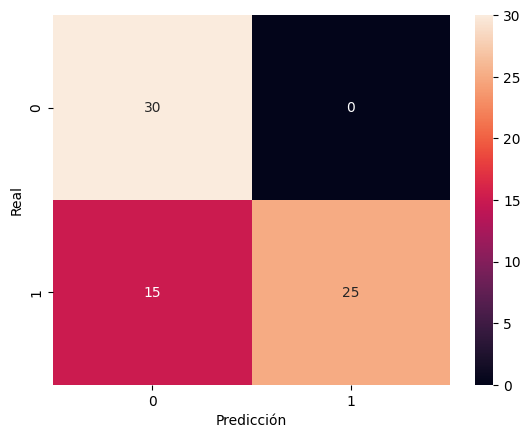

In [17]:
# Create a resulting y_test and y_pred from the results
y_pred_m = []
y_test_m = []
for i in range(len(results)):
  y_pred_m.extend(results[i].predict(X_test))
  y_test_m.extend(y_test)
# Classification matrix with the real target and predicted target
sns.heatmap(pd.crosstab(y_test_m, y_pred_m, rownames=['Real'], colnames=['Predicción']), annot=True, fmt='d')
plt.show()